In [6]:
! python train.py

Traceback (most recent call last):
  File "/work3/kniud/object_detection/SSD_github/SSD-pytorch_2/train.py", line 8, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


In [3]:
import torch

In [3]:
os.getcwd()

'/work3/kniud/object_detection/SSD_github/SSD-pytorch_2'

In [62]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from PIL import Image, ExifTags
from pycocotools.coco import COCO
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import random
import pylab
from torchvision.ops import masks_to_boxes
import torch

dataset_path =  "/media/udayanga/data_2/SSD_new_github/SSD-pytorch/coco_dataset/downloads/val2017/"
anns_file_path = "/media/udayanga/data_2/SSD_new_github/SSD-pytorch/coco_dataset/downloads/annotations/instances_val2017.json"   
#os.path.join(dataset_path, '/work3/kniud/object_detection/Data_preparation_and_visualization/image_data_preparation/temp.json')
coco=COCO(anns_file_path)

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
import numpy as np

rotXdeg = 90
rotYdeg = 90
rotZdeg = 90
f = 500
dist = 500

def onRotXChange(val):
    global rotXdeg
    rotXdeg = val
def onRotYChange(val):
    global rotYdeg
    rotYdeg = val
def onRotZChange(val):
    global rotZdeg
    rotZdeg = val
def onFchange(val):
    global f
    f=val
def onDistChange(val):
    global dist
    dist=val
nr_annotations = len(anns)
nr_images = len(imgs)

# Load categories and super categories
cat_names = []
for cat_it in categories:
    cat_names.append(cat_it['name'])


print('Number of categories:', nr_cats)
print('Number of annotations:', nr_annotations)
print('Number of images:', nr_images)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
Number of categories: 80
Number of annotations: 36781
Number of images: 5000


In [41]:
test = []
for ann in anns:
    if ann["category_id"]:
        test.append(ann["category_id"])

In [45]:
list(set(test))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [36]:
np.array(test).max()

90

ValueError: All arrays must be of the same length

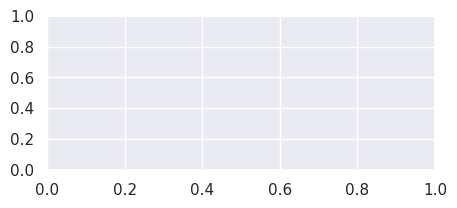

In [49]:
# Count annotations
cat_histogram = np.zeros(91,dtype=int)
for ann in anns:
    cat_histogram[ann['category_id']] += 1

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5,2))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
#df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
# sns.set_color_codes("pastel")
# sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b")

# fig = plot_1.get_figure()


In [3]:
#hotencode_cats = {0:'crack', 1:'spalling'}

In [21]:
cat_histogram

array([  0, 221,  75, 110,  89,   4,  20,   2,   0,   8,   0,   0,   0,
         2,   0,   0,   6,  32,  22,  16,   5,   5,   0,   0,   0,   0,
         0,   0,  25,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 114,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,  37,  14,  33,
         5,   0,  17,   0,   0,   0,   0,  19,   0,   0,   0,   0,   7,
         0,   0,   0])

In [10]:
hotencode_cats = {}

In [50]:
for idx in range(92):
    hotencode_cats[idx] = str(idx)
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


In [51]:
hotencode_cats

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '10',
 11: '11',
 12: '12',
 13: '13',
 14: '14',
 15: '15',
 16: '16',
 17: '17',
 18: '18',
 19: '19',
 20: '20',
 21: '21',
 22: '22',
 23: '23',
 24: '24',
 25: '25',
 26: '26',
 27: '27',
 28: '28',
 29: '29',
 30: '30',
 31: '31',
 32: '32',
 33: '33',
 34: '34',
 35: '35',
 36: '36',
 37: '37',
 38: '38',
 39: '39',
 40: '40',
 41: '41',
 42: '42',
 43: '43',
 44: '44',
 45: '45',
 46: '46',
 47: '47',
 48: '48',
 49: '49',
 50: '50',
 51: '51',
 52: '52',
 53: '53',
 54: '54',
 55: '55',
 56: '56',
 57: '57',
 58: '58',
 59: '59',
 60: '60',
 61: '61',
 62: '62',
 63: '63',
 64: '64',
 65: '65',
 66: '66',
 67: '67',
 68: '68',
 69: '69',
 70: '70',
 71: '71',
 72: '72',
 73: '73',
 74: '74',
 75: '75',
 76: '76',
 77: '77',
 78: '78',
 79: '79',
 80: '80',
 81: '81',
 82: '82',
 83: '83',
 84: '84',
 85: '85',
 86: '86',
 87: '87',
 88: '88',
 89: '89',
 90: '90',
 91: '91'}

In [52]:
def load_image_id(image_name):
    img_id = -1
    for img_info in imgs:
        if img_info['file_name'] == image_name:
            image_id = img_info['id']
    
    return image_id

def load_image_anns(image_id):
    image_anns = []
    for anns_info in anns:
        if anns_info['image_id'] == image_id:
            image_anns.append(anns_info)
    
    return image_anns

In [59]:
corrector = 1 
# in the json labelling category == 1 mean crack category == 2 means spalling. 
def plot_ims_anns(img_list, subfolder, dataset_path,to_save_modified_json_path = None):

    if to_save_modified_json_path:
        f = open("to_save_modified_json_path")
    
    crack_annotations = 0
    spalling_annotations = 0

    img_count = 0
    
    for image_filepath in img_list:
        img_count += 1        
        image_filepath = image_filepath['file_name']
        # Obtain Exif orientation tag code
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        # Find image id
        img_id = -1
        for img in imgs:
            if img['file_name'] == image_filepath:
                img_id = img['id']
                break

        # Show image and corresponding annotations
        if img_id == -1:
            print('Incorrect file name')
        else:

            # Load image
            print(image_filepath)
            I = Image.open(os.path.join(dataset_path, subfolder, image_filepath))

            # Load and process image metadata
            if I._getexif():
                exif = dict(I._getexif().items())
                # Rotate portrait and upside down images if necessary
                if orientation in exif:
                    if exif[orientation] == 3:
                        I = I.rotate(180,expand=True)
                    if exif[orientation] == 6:
                        I = I.rotate(270,expand=True)
                    if exif[orientation] == 8:
                        I = I.rotate(90,expand=True)

            # Show image
            fig,ax = plt.subplots(1)
            plt.axis('off')
            plt.imshow(I)

            # Load mask ids

            annIds = load_image_id(image_filepath)
            anns_sel = load_image_anns(annIds)
            # Show annotations
            #for ann in anns_sel:
            #    for b
            for ann in anns_sel:
                color = colorsys.hsv_to_rgb(np.random.random(),1,1)
                count = 0
            
                x,y,w,h = ann['bbox']
                    #print(x,y,w,h)
                className = hotencode_cats[ann['category_id'] - corrector] 
                rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                                     facecolor='none', alpha=0.7, linestyle = '--')
                ax.text(x+30, y, className,
                            verticalalignment='bottom', horizontalalignment='right',
                            color=color, fontsize=11)
                ax.add_patch(rect)
                    
                    
                for seg in ann['segmentation']:
                    if len(seg) < 20:
                        continue
                    
                    seg_coords = np.array(seg).reshape((int(len(seg)/2), 2))
                    poly = Polygon(seg_coords)
                    p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
                    ax.add_collection(p)
                    p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
                    ax.add_collection(p)
                    
                    # Generage mask for annotation
                    mask = np.zeros((img['height'],img['width']))
                    className = hotencode_cats[ann['category_id'] - corrector] #hotencode_cats[ann['category_id'] - 3]
                    mask = np.maximum(coco.annToMask(ann)*1, mask)
                    
                    torchmask = torch.tensor(mask).reshape(1,*mask.shape)
                    boxes = masks_to_boxes(torchmask)
                    #print(boxes)
                    [x, y, w, h] = boxes[0,0], boxes[0,1], boxes[0,2] - boxes[0,0], boxes[0,3] - boxes[0,1]
                    className = hotencode_cats[ann['category_id'] - corrector] 
                    if ann["category_id"] == 1:
                        crack_annotations += 1
                    if ann["category_id"] == 2:
                        spalling_annotations += 1
                    x = np.min(seg_coords[:,0])
                    y = np.min(seg_coords[:,1])
                    w = np.max(seg_coords[:,0]) - np.min(seg_coords[:,0])
                    h = np.max(seg_coords[:,1]) - np.min(seg_coords[:,1])
                    
                    rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color,
                                     facecolor='none', alpha=0.7, linestyle = '--')
                    ax.text(x+30, y, className,
                            verticalalignment='bottom', horizontalalignment='right',
                            color=color, fontsize=11)
                    ax.add_patch(rect)
                    
                    #plt.imshow(mask)
                #print("crack abd spalling  is ",crack_annotations," ",spalling_annotations)
                        
            plt.show()

000000527616.jpg


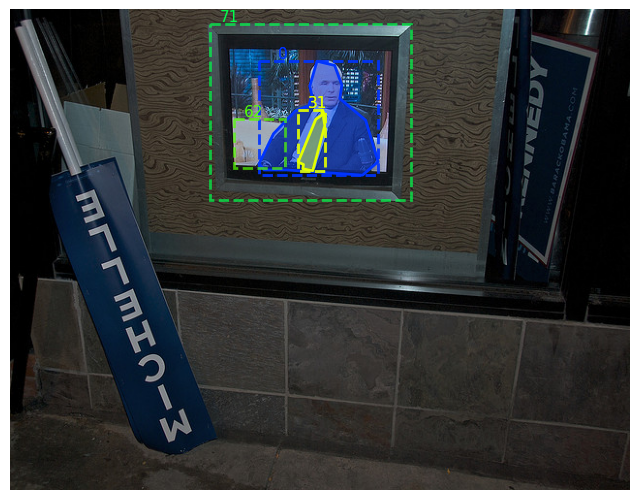

000000502347.jpg


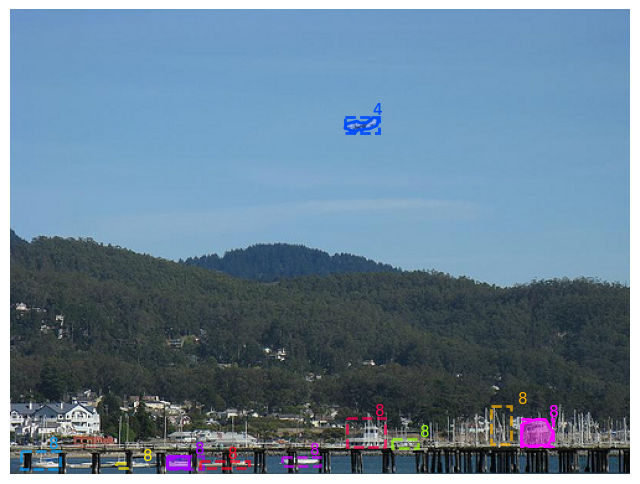

000000334767.jpg


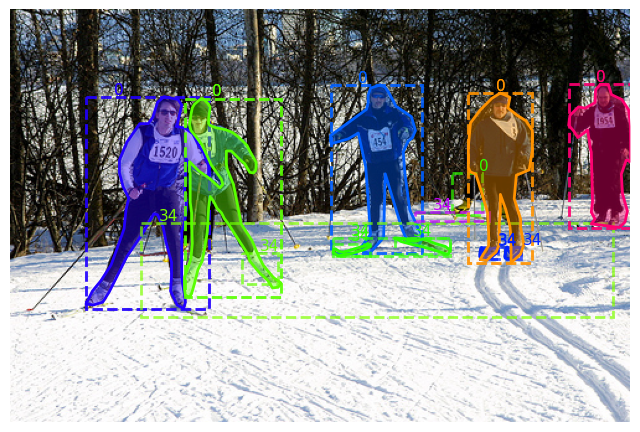

000000279774.jpg


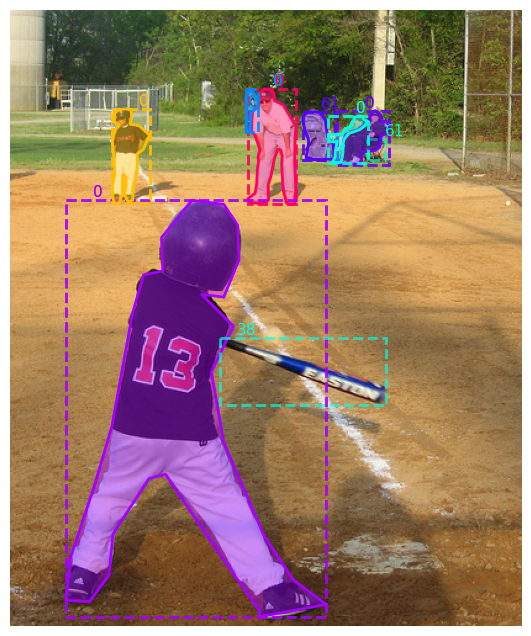

000000471789.jpg


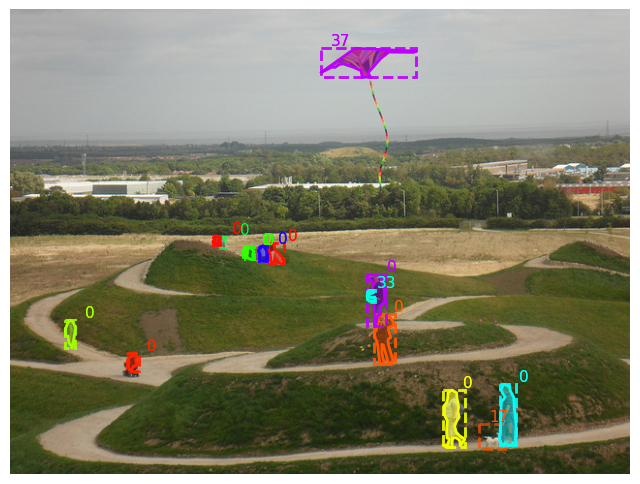

000000118921.jpg


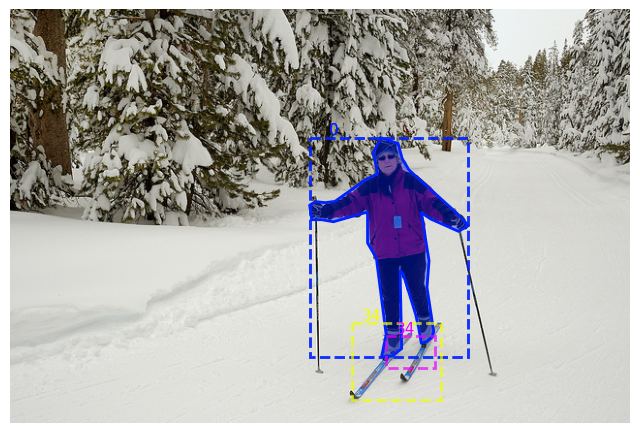

000000455937.jpg


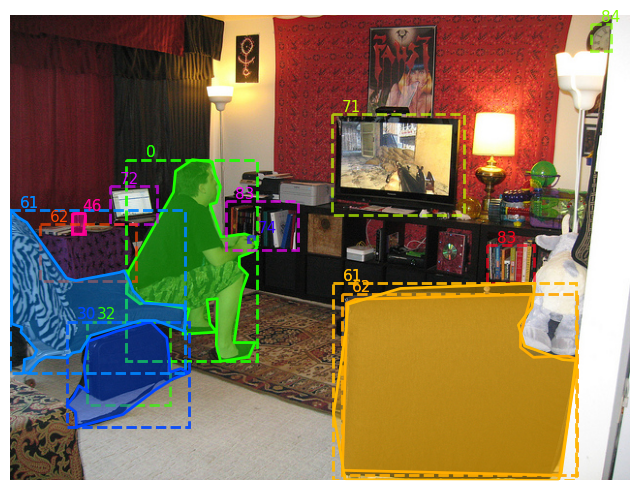

000000266981.jpg


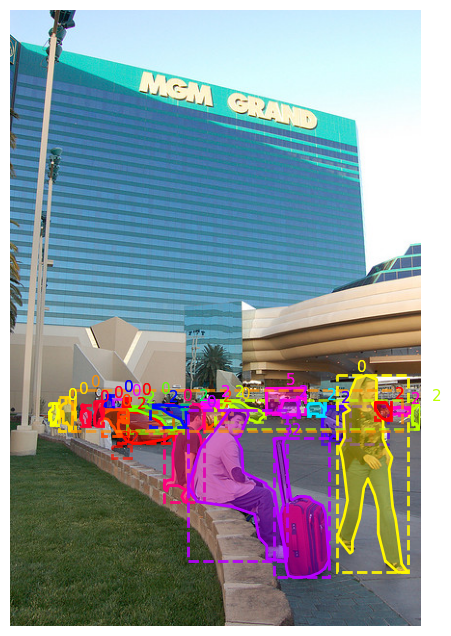

000000384136.jpg


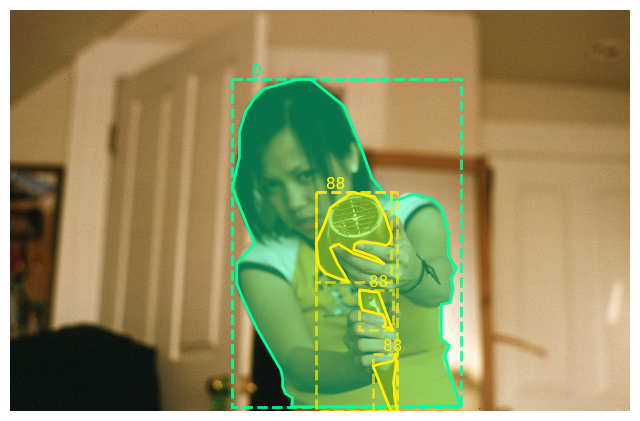

000000418281.jpg


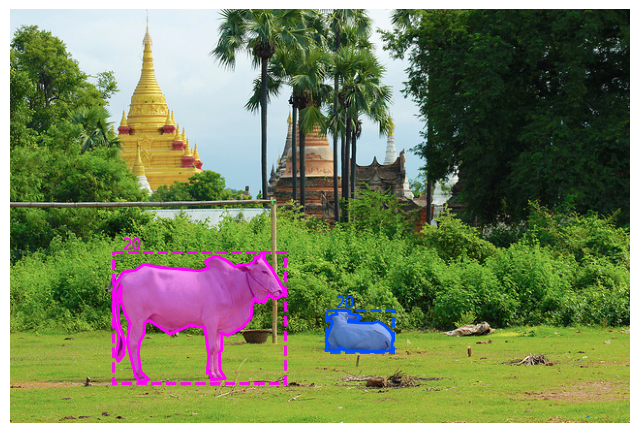

In [60]:
# User settings
subfolder = './'
#Randomly select 10 images to display the annotations
img_list = random.choices(imgs, k=10)
pylab.rcParams['figure.figsize'] = (8,8)
####################
plot_ims_anns(img_list, subfolder, dataset_path)